## Parametry

In [7]:
SERIES_LENGHT = 72
VALUES_DATATYPE = 'float16'
LEARNING_RATE = 0.0001
EPOCHS = 100
BATCH_SIZE = 20
COMPRESSION = 7

## Wczytanie danych z pliku

In [8]:
import numpy as np

data = np.load("../resources/" + "data_%s_series_%d_compression_%d.npy" % (VALUES_DATATYPE, SERIES_LENGHT, COMPRESSION))
print(data)
print(data.shape)

[[[-0.2517  -0.2258  -0.02579 ...  0.       0.       0.     ]
  [-0.2517  -0.2478  -0.02579 ...  0.       0.       0.     ]
  [-0.2517  -0.2698  -0.07367 ...  0.       0.       0.     ]
  ...
  [ 5.336   -0.4893  -0.3372  ...  0.       0.       0.     ]
  [ 0.1473  -0.555   -0.4568  ...  0.       0.       0.     ]
  [-0.2517  -0.4233  -0.385   ...  0.       0.       0.     ]]

 [[-0.2517  -0.2917  -0.1216  ...  0.       0.       0.     ]
  [-0.2517  -0.3357  -0.1934  ...  0.       0.       0.     ]
  [-0.2517  -0.3574  -0.2173  ...  0.       0.       0.     ]
  ...
  [-0.2517  -0.709   -0.864   ...  0.       0.       0.     ]
  [-0.05212 -0.8623  -1.008   ...  0.       0.       0.     ]
  [ 0.9453  -1.126   -1.151   ...  0.       0.       0.     ]]

 [[-0.2517  -0.4453  -0.6006  ...  0.       0.       0.     ]
  [-0.2517  -0.577   -0.6724  ...  0.       0.       0.     ]
  [-0.2517  -0.643   -0.84    ...  0.       0.       0.     ]
  ...
  [-0.2517  -0.8843  -1.031   ...  0.       0.  

## Wydzielenie zbiorów

In [9]:
from sklearn.model_selection import train_test_split

X = np.swapaxes(data[:, :SERIES_LENGHT - 1, :],1,2)
Y = np.swapaxes(data[:, SERIES_LENGHT - 1:, :],1,2)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)
print("Dane treningowe: "+ str(X_train.shape))

Dane treningowe: (184649, 37, 71)


## Definicja sieci

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import *
from script.main.loss_functions import *
import tensorflow as tf

model = Sequential()
model.add(LSTM(units=512, activation=tf.keras.layers.LeakyReLU(alpha=0.3), return_sequences=True, input_shape=(37, SERIES_LENGHT - 1)))
model.add(LSTM(units=512, activation=tf.keras.layers.LeakyReLU(alpha=0.3)))
model.add(Dense(19))
model.compile(loss=mean_proportional_loss_func, optimizer=Adam(lr=LEARNING_RATE), metrics=['accuracy'])

## Diagram sieci

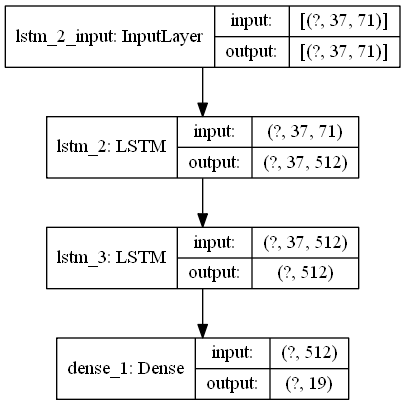

In [11]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

## Uczenie

In [12]:
from script.main.callback.hyperdash_callback import HyperdashCallback
my_callbacks = [
    tf.keras.callbacks.TensorBoard(log_dir='.\logs', histogram_freq=1),
    HyperdashCallback(),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
]
 
model.fit(X_train,Y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=2, callbacks=my_callbacks, validation_data=(X_test, Y_test))


Train on 184649 samples, validate on 61550 samples
Epoch 1/100
| progress:   0.578982 |
| loss:   0.421018 |
| val_loss:   0.356274 |
184649/184649 - 456s - loss: 0.4210 - accuracy: 0.2001 - val_loss: 0.3563 - val_accuracy: 0.2044
Epoch 2/100
| progress:   0.096536 |
| loss:   0.324482 |
| val_loss:   0.291563 |
184649/184649 - 443s - loss: 0.3245 - accuracy: 0.2416 - val_loss: 0.2916 - val_accuracy: 0.3024
Epoch 3/100
| progress:   0.053482 |
| loss:   0.271000 |
| val_loss:   0.258822 |
184649/184649 - 446s - loss: 0.2710 - accuracy: 0.3119 - val_loss: 0.2588 - val_accuracy: 0.3542
Epoch 4/100
| progress:   0.013480 |
| loss:   0.257520 |
| val_loss:   0.248099 |
184649/184649 - 440s - loss: 0.2575 - accuracy: 0.3400 - val_loss: 0.2481 - val_accuracy: 0.3507
Epoch 5/100
| progress:   0.017062 |
| loss:   0.240457 |
| val_loss:   0.235653 |
184649/184649 - 440s - loss: 0.2405 - accuracy: 0.3814 - val_loss: 0.2357 - val_accuracy: 0.3888
Epoch 6/100
| progress:   0.021049 |
| loss:   0.

## Zapis modelu od pliku

In [13]:
model.save("../resources/trained_model.h5", save_format='tf')

## Zapis danych testowych do pliku

In [14]:
np.save("../resources/test_data/X_test", X_test)
np.save("../resources/test_data/Y_test", Y_test)

## 